<a href="https://colab.research.google.com/github/sharwari-pathak/Netflix-Content-Trends-and-Viewer-Engagement-Analysis/blob/main/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data Collection and Preparation**


a. Load Data

In [ ]:
import pandas as pd

# Load Netflix dataset
netflix_data = pd.read_csv('/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv')

# Display the first few rows of the dataframe
print(netflix_data.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [ ]:
print(netflix_data.shape)

(8807, 12)


In [ ]:
print(netflix_data.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


b. Handle Missing Values

In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
print(netflix_data.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
# Fill missing values or drop rows with missing data
netflix_data = netflix_data.dropna(subset=['director', 'cast', 'country', 'rating','duration'])

# Fill missing 'date_added' with a placeholder or the most frequent value
netflix_data['date_added'] = netflix_data['date_added'].fillna('Unknown')

# Check again for missing values
print(netflix_data.isnull().sum())


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


<ipython-input-6-98df0e5e0014>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data['date_added'] = netflix_data['date_added'].fillna('Unknown')


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv')

# Display the number of duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Save the cleaned data back to a new CSV file, optional
#df_cleaned.to_csv('/path/to/your/cleaned_netflix_titles.csv', index=False)

# Verify the removal
print("Data after removing duplicates:")
print(df_cleaned.info())


Number of duplicate rows: 0
Data after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


c. Normalize Data Formats

In [ ]:
# Convert 'date_added' to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

# Extract year from 'date_added'
netflix_data['year_added'] = netflix_data['date_added'].dt.year

# Standardize the 'duration' field
netflix_data['duration'] = netflix_data['duration'].str.replace(' Season', ' Seasons')
netflix_data['duration'] = netflix_data['duration'].str.replace(' min', ' Minutes')

print(netflix_data.head())

   show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                              country date_added  \
7   United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
8                                      United Kingdom 2021-09-24   
9 

In [ ]:
#normalize dataformats
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv')

# Example 1: Normalize date formats
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Example 2: Convert durations from strings to numeric values (extract numbers)
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

# Example 3: Standardize categorical data (e.g., type column to lowercase)
df['type'] = df['type'].str.lower()

# Example 4: Trim whitespace from all string columns
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].str.strip()

# Example 5: Check for mixed data types and convert them
if df['release_year'].dtype == 'O':  # 'O' stands for object, which is often a string
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Save the cleaned data to a new CSV file
#df.to_csv('/path/to/your/normalized_netflix_titles.csv', index=False)

# Show the cleaned data types
print(df.dtypes)


show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration               float64
listed_in               object
description             object
dtype: object


In [ ]:
import pandas as pd
from scipy import stats

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv')


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv')

# Convert duration from string to minutes
def convert_to_minutes(duration_str):
    try:
        number, unit = duration_str.split()
        number = int(number)
        if "Season" in unit or "season" in unit:  # Approximate 1 season as 500 minutes
            return number * 500
        elif "min" in unit:
            return number
    except:
        return None

df['duration_minutes'] = df['duration'].apply(convert_to_minutes)

# Drop rows with NaN values in 'duration_minutes'
df_clean = df.dropna(subset=['duration_minutes'])

# Using IQR to find outliers
Q1 = df_clean['duration_minutes'].quantile(0.25)
Q3 = df_clean['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_duration = df_clean[(df_clean['duration_minutes'] < lower_bound) | (df_clean['duration_minutes'] > upper_bound)]

# Print the outliers
print(outliers_duration[['title', 'duration', 'duration_minutes']])


                              title   duration  duration_minutes
8     The Great British Baking Show  9 Seasons            4500.0
15                Dear White People  4 Seasons            2000.0
21           Resurrection: Ertugrul  5 Seasons            2500.0
32                    Sex Education  3 Seasons            1500.0
39                     Chhota Bheem  3 Seasons            1500.0
...                             ...        ...               ...
8684                        Vroomiz  3 Seasons            1500.0
8710                          Weeds  8 Seasons            4000.0
8726           When Calls the Heart  5 Seasons            2500.0
8755              Women Behind Bars  3 Seasons            1500.0
8797                      Zak Storm  3 Seasons            1500.0

[458 rows x 3 columns]


# **2. Exploratory Data Analysis (EDA)**

Number of Movies vs TV Shows

<ipython-input-12-9cc30a542953>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data= netflix_data, palette="Set2")


<Axes: xlabel='type', ylabel='count'>

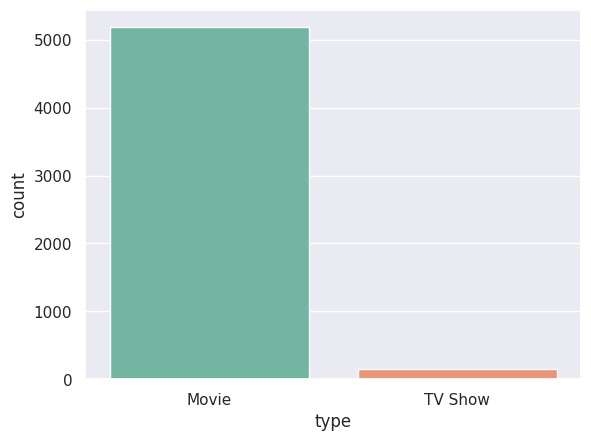

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="type", data= netflix_data, palette="Set2")

# **Movies & TV Shows Ratings analysis**

In [ ]:
#2 different dataframes for movies and TV shows
import matplotlib.pyplot as plt
movie_df = netflix_data[netflix_data['type'] == 'Movie']
tv_df = netflix_data[netflix_data['type'] == 'TV Show']

Graph with title

<ipython-input-14-baffcaa3b392>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="country", data=movie_df, palette="Accent", order=movie_df['country'].value_counts().index[0:12])


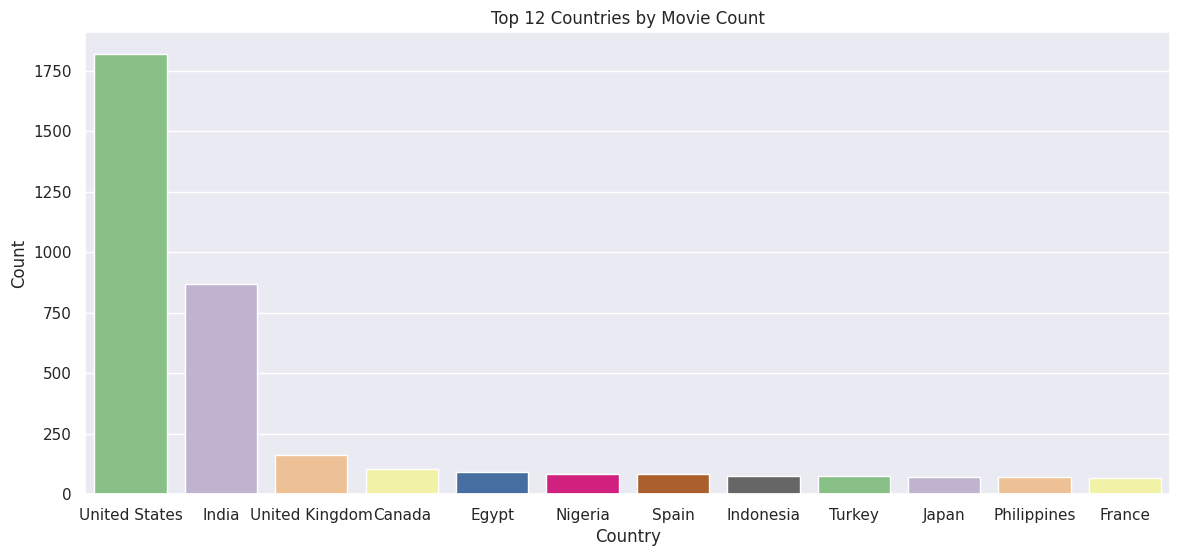

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
sns.countplot(x="country", data=movie_df, palette="Accent", order=movie_df['country'].value_counts().index[0:12])
plt.title("Top 12 Countries by Movie Count")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

<ipython-input-15-36225137dd59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="country", data=tv_df, palette="Accent", order=tv_df['country'].value_counts().index[0:12])


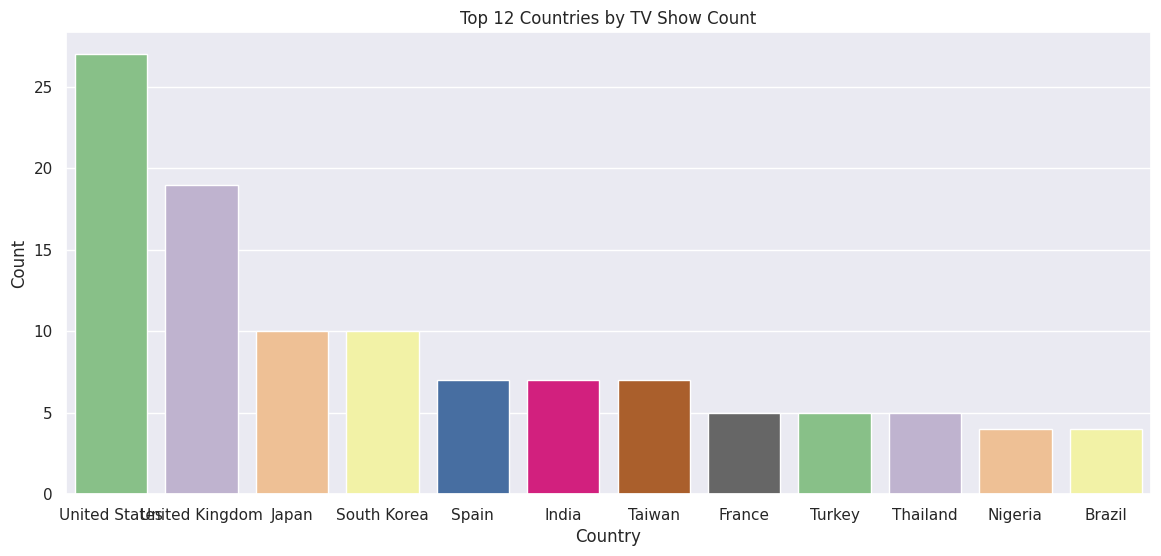

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
sns.countplot(x="country", data=tv_df, palette="Accent", order=tv_df['country'].value_counts().index[0:12])
plt.title("Top 12 Countries by TV Show Count")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

<ipython-input-16-e3722b1c0ff2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data= movie_df, palette="Accent", order=movie_df['rating'].value_counts().index[0:15])


<Axes: xlabel='rating', ylabel='count'>

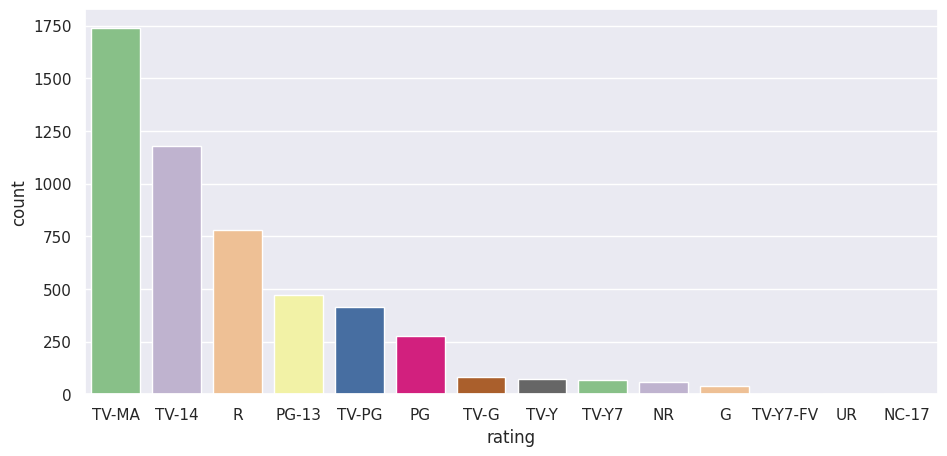

In [ ]:
#MOVIES RATINGS
plt.figure(figsize=(11,5))
sns.set(style="darkgrid")
sns.countplot(x="rating", data= movie_df, palette="Accent", order=movie_df['rating'].value_counts().index[0:15])

<ipython-input-17-7262c2766c85>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=tv_df, palette="Accent", order=tv_df['rating'].value_counts().index[0:15])


<Axes: xlabel='rating', ylabel='count'>

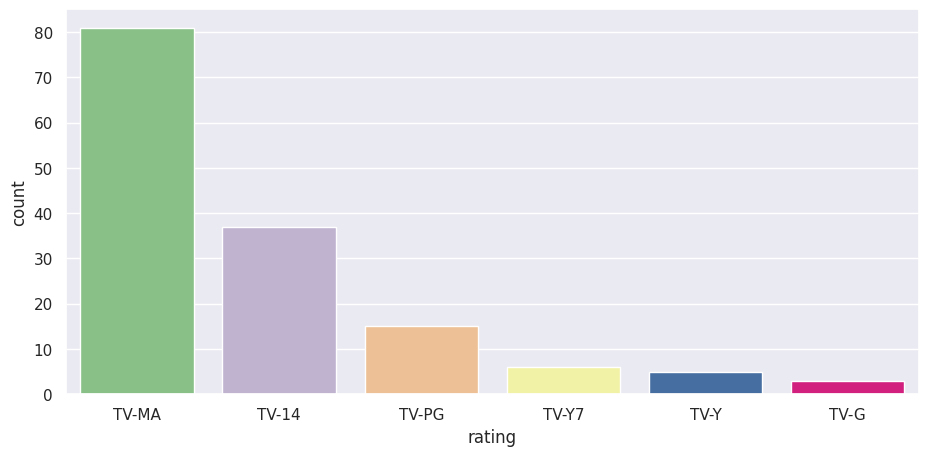

In [ ]:
# TV SHOWS RATINGS
plt.figure(figsize=(11,5))
sns.set(style="darkgrid")
sns.countplot(x="rating", data=tv_df, palette="Accent", order=tv_df['rating'].value_counts().index[0:15])

# **Yearly Analysis of content**

<Axes: xlabel='count', ylabel='release_year'>

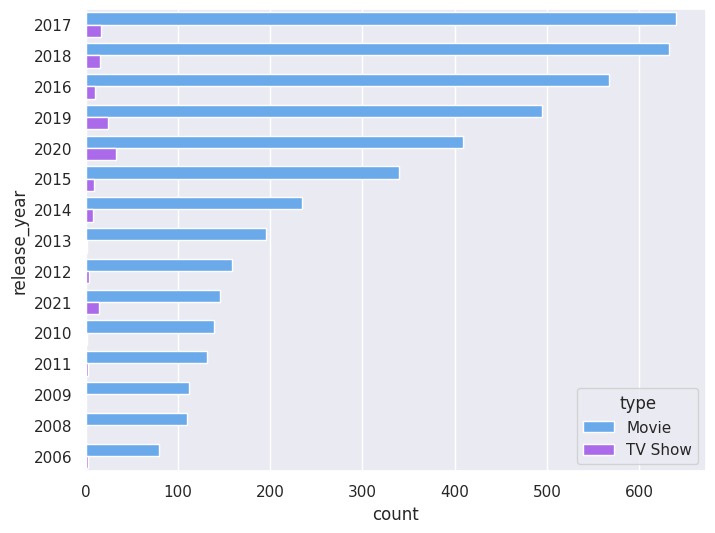

In [ ]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
sns.countplot(y="release_year", data= netflix_data, palette="cool", order= netflix_data['release_year'].value_counts().index[0:15],hue=netflix_data['type'])

# **Analysis of movies duration**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv'
netflix_data = pd.read_csv(file_path)

# Filter the DataFrame for Movies only
movie_df = netflix_data[netflix_data['type'] == 'Movie']

# Step 1: Ensure 'duration' is a string
movie_df['duration'] = movie_df['duration'].astype(str)

# Step 2: Replace ' min' and handle empty strings
movie_df['duration'] = movie_df['duration'].str.replace(' min', '').replace('', np.nan)

# Step 3: Convert the 'duration' column to numeric, using errors='coerce' to handle any non-numeric issues safely
movie_df['duration'] = pd.to_numeric(movie_df['duration'], errors='coerce')

# Step 4: Drop rows where 'duration' is NaN
movie_df.dropna(subset=['duration'], inplace=True)

# Step 5: Display the first few rows of the modified 'duration' column to confirm the changes
print(movie_df['duration'].head())

0      90.0
6      91.0
7     125.0
9     104.0
12    127.0
Name: duration, dtype: float64


<ipython-input-19-c12a44f77ac9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration'] = movie_df['duration'].astype(str)
<ipython-input-19-c12a44f77ac9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration'] = movie_df['duration'].str.replace(' min', '').replace('', np.nan)
<ipython-input-19-c12a44f77ac9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64


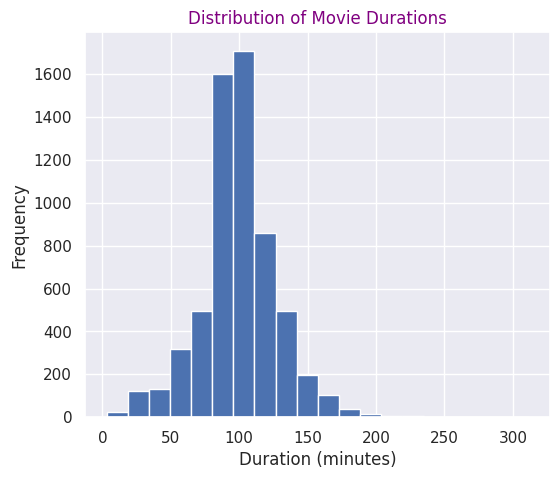

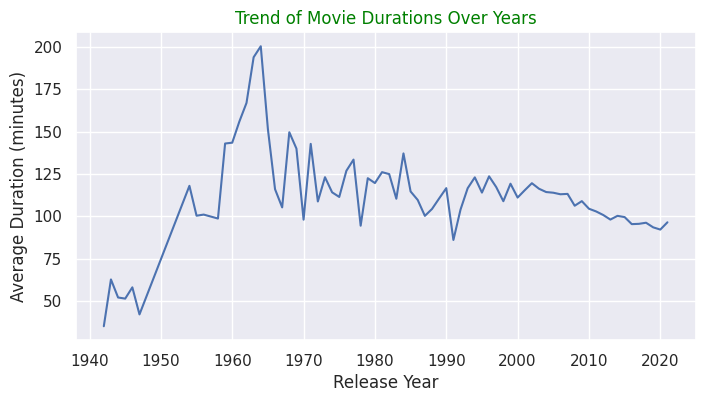

In [ ]:
# Summary statistics
print(movie_df['duration'].describe())

# Distribution of movie durations (histogram)
plt.figure(figsize=(6, 5))
movie_df['duration'].hist(bins=20)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Durations', color = 'purple')
plt.show()

# Comparison of movie durations by genre (optional)
# Splitting 'listed_in' column into multiple rows
movie_genres = movie_df.assign(genres=movie_df['listed_in'].str.split(',')).explode('genres')
# Strip whitespace from genre names
movie_genres['genres'] = movie_genres['genres'].str.strip()

# Line Chart - Trends of Durations Over Years
avg_duration_by_year = movie_df.groupby('release_year')['duration'].mean()
plt.figure(figsize=(8, 4))
sns.lineplot(x=avg_duration_by_year.index, y=avg_duration_by_year.values)
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.title('Trend of Movie Durations Over Years', color='green')
plt.show()

<ipython-input-21-0b8201eb155d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=movie_df['duration'], shade=True)


<Axes: xlabel='duration', ylabel='Density'>

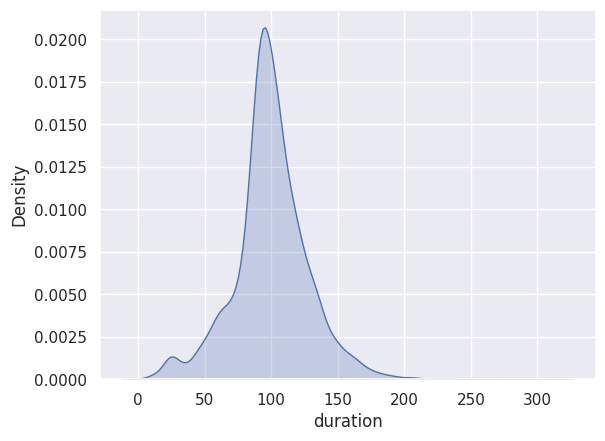

In [ ]:
sns.set(style="darkgrid")
sns.kdeplot(data=movie_df['duration'], shade=True)

So, a good amount of movies on Netflix are among the duration of 75-120 mins.

trends of movies duration

<ipython-input-22-335a1f022f95>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration'] = pd.to_numeric(movie_df['duration'], errors='coerce')
<ipython-input-22-335a1f022f95>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.dropna(subset=['duration'], inplace=True)


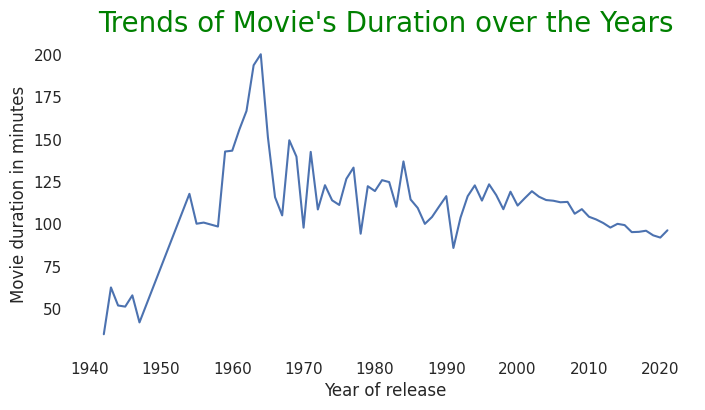

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'duration' is numeric and handle errors
movie_df['duration'] = pd.to_numeric(movie_df['duration'], errors='coerce')

# Drop any NaN values that arise from conversion issues
movie_df.dropna(subset=['duration'], inplace=True)

# Group by 'release_year' and compute the mean duration
duration_year = movie_df.groupby(['release_year'])['duration'].mean()
duration_year.sort_index(inplace=True)

# Plotting
plt.figure(figsize=(8,4))
sns.lineplot(x=duration_year.index, y=duration_year.values)
plt.box(on=None)
plt.ylabel('Movie duration in minutes')
plt.xlabel('Year of release')
plt.title("Trends of Movie's Duration over the Years", fontsize=20, color='green')
plt.show()


# **Analysis of TV Shows with most number of seasons**

In [ ]:
tv_df['duration']=tv_df['duration'].str.replace(' Season','')
tv_df['duration']=tv_df['duration'].str.replace('s','')
tv_df['duration']=tv_df['duration'].astype(str).astype(int)
tv_df['duration']

,duration
8,9
198,1
273,1
276,2
297,1
...,...
8172,1
8214,1
8293,1
8302,1


In [ ]:
#Extract the columns from tv_df
columns=['title','duration']
tv_shows = tv_df[columns]

In [ ]:
#sort the dataframe by number of seasons
tv_shows = tv_shows.sort_values(by='duration',ascending=False)
tv_shows
top20 = tv_shows[0:20]
top20

,title,duration
2423,Supernatural,15
8,The Great British Baking Show,9
3541,Naruto,9
1998,Call the Midwife,9
2947,Arrow,8
7896,Royal Pains,8
380,The Flash,7
6742,Father Brown,6
1173,Men on a Mission,6
3653,Comedians in Cars Getting Coffee,6


<Axes: xlabel='title'>

<Figure size 1000x600 with 0 Axes>

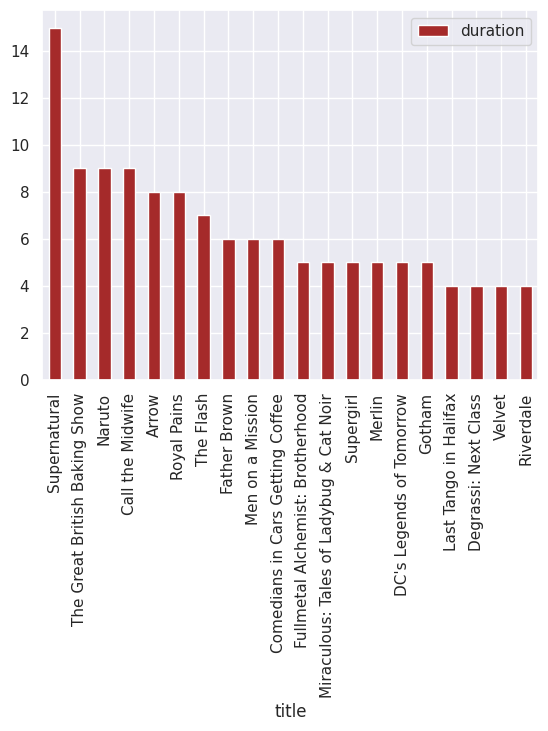

In [ ]:
plt.figure(figsize=(10,6))
top20.plot(kind='bar',x='title',y='duration', color='brown')

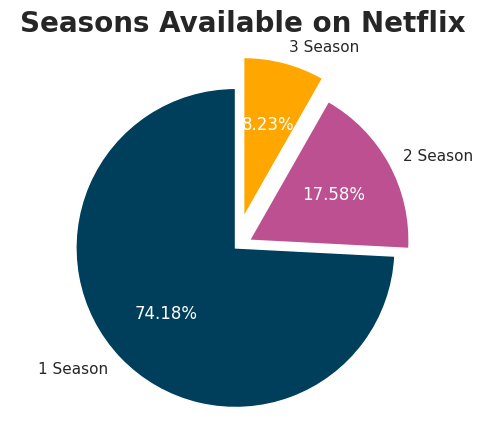

In [ ]:
# TV SHOWS AND THEIR SEASONS
plt.figure(figsize=(6, 5))
labels=['1 Season', '2 Season', '3 Season']
_, _, texts = plt.pie(netflix_data.duration.value_counts()[:3], labels=labels, autopct='%1.2f%%', startangle=90,
                      explode=(0.0, 0.1, 0.2), colors=['#003f5c', '#bc5090', '#ffa600'])
plt.axis('equal')
plt.title('Seasons Available on Netflix', fontsize=20, fontweight='bold');
for text in texts:
    text.set_color('white')

# **Countries on top for movies content creation**

<ipython-input-28-2ead3d066bae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="country", data=movie_df, palette="Accent", order=movie_df['country'].value_counts().index[0:12])


<Axes: xlabel='country', ylabel='count'>

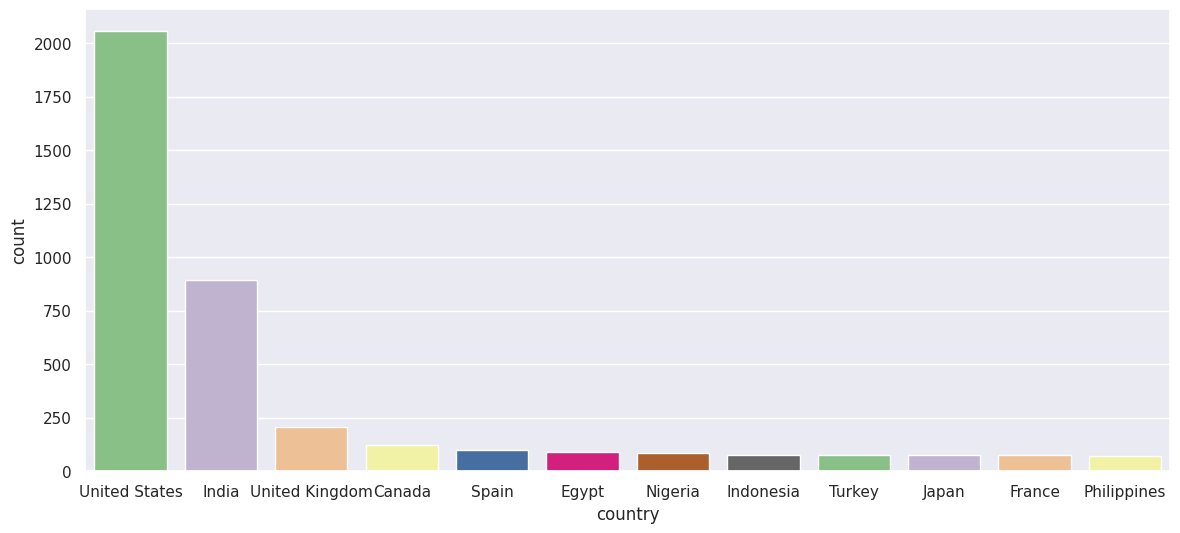

In [ ]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
sns.countplot(x="country", data=movie_df, palette="Accent", order=movie_df['country'].value_counts().index[0:12])

# **Countries on top for TV Show content creation**

<ipython-input-29-244b41ebc669>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="country", data=tv_df, palette="Accent", order=tv_df['country'].value_counts().index[0:12])


<Axes: xlabel='country', ylabel='count'>

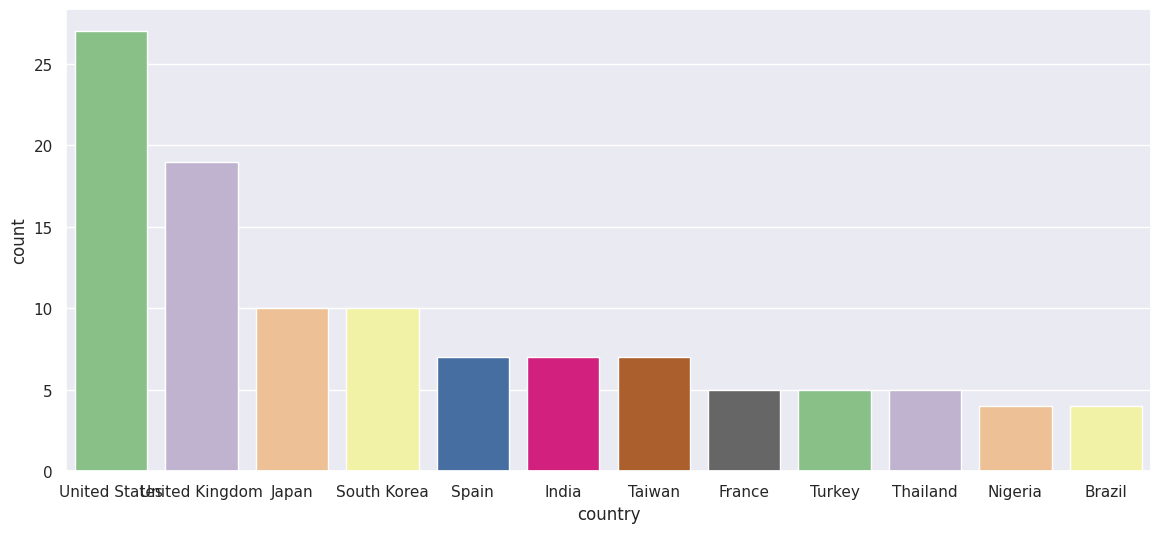

In [ ]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
sns.countplot(x="country", data=tv_df, palette="Accent", order=tv_df['country'].value_counts().index[0:12])

# **Most Popular Genre on Netflix**

<ipython-input-30-b0c4745eb8b2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='RdPu')


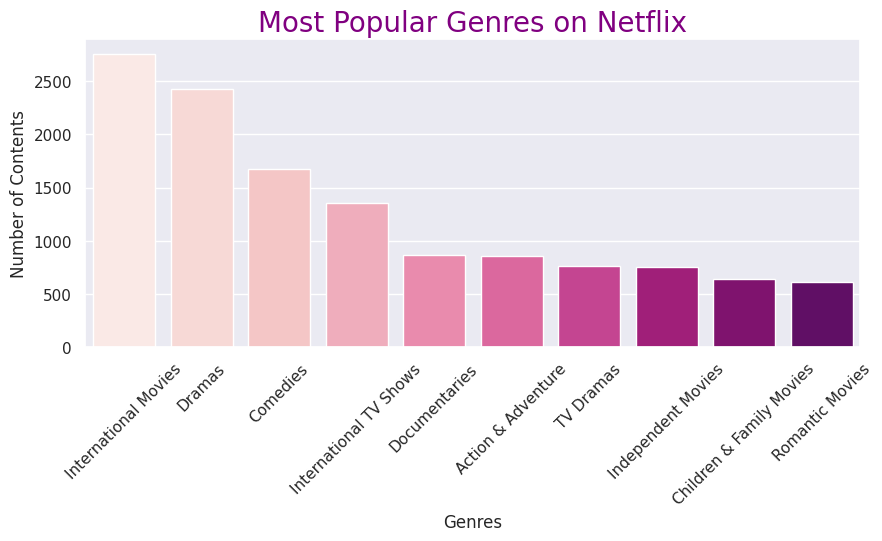

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
netflix_data = pd.read_csv('/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv')
# Normalize genre data: assuming genres are separated by commas
# Split the genres into a list, explode them into separate rows
netflix_data['genre_list'] = netflix_data['listed_in'].str.split(', ')
exploded_genres = netflix_data.explode('genre_list')

# Count the occurrences of each genre
genre_counts = exploded_genres['genre_list'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(10,4))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='RdPu')
plt.title('Most Popular Genres on Netflix', fontsize=20, color='purple')
plt.xlabel('Genres')
plt.ylabel('Number of Contents')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

a. Genres Popular Among Different Age Groups

<ipython-input-31-a6dce521d5b0>:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 2000x1800 with 0 Axes>

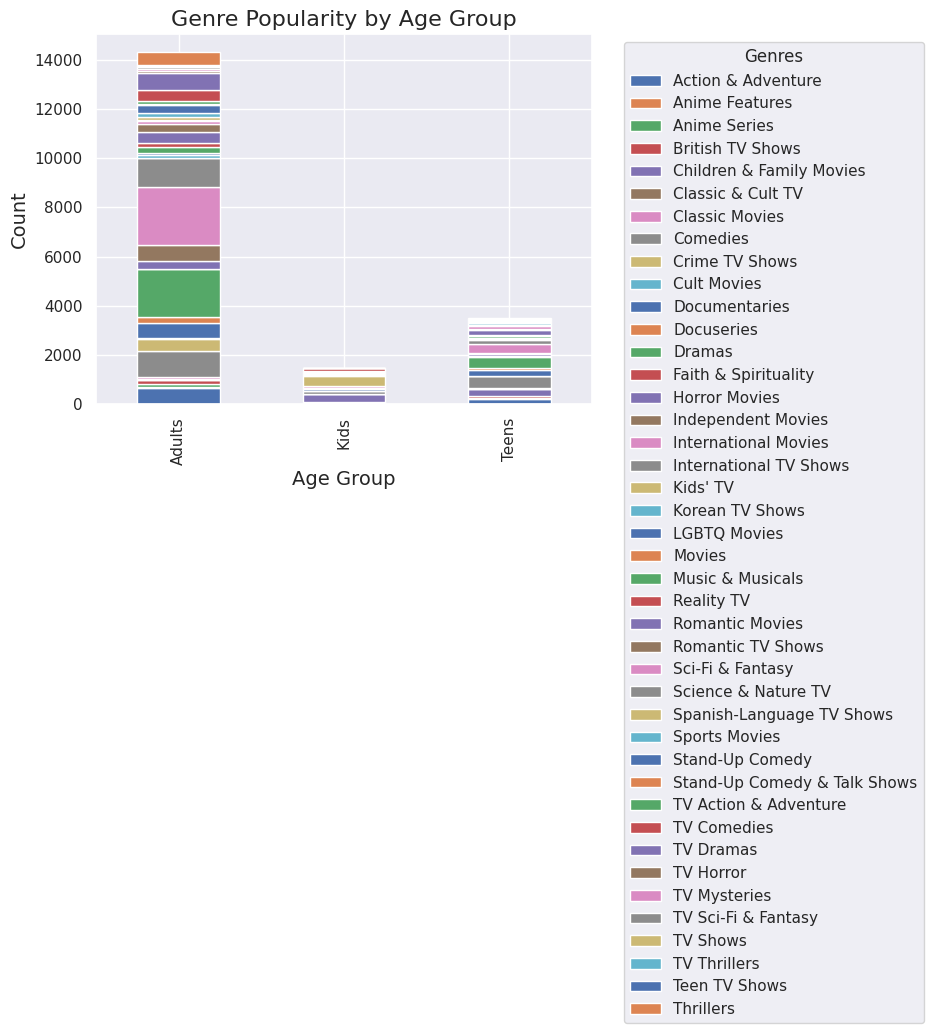

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the age groups based on ratings
age_groups = {
    'Kids': ['TV-Y', 'TV-G', 'G', 'TV-Y7', 'TV-Y7-FV'],
    'Teens': ['PG', 'TV-PG', 'PG-13'],
    'Adults': ['R', 'NC-17', 'TV-MA']
}

# Map ratings to age groups
netflix_data['age_group'] = netflix_data['rating'].apply(
    lambda x: next((k for k, v in age_groups.items() if x in v), 'Adults')
)

# Ensure that 'listed_in' column is only split if it hasn't been already
if isinstance(netflix_data['listed_in'].iloc[0], str):
    netflix_data['listed_in'] = netflix_data['listed_in'].apply(lambda x: x.split(', '))

# Explode the 'listed_in' column to count each genre separately
netflix_data_exploded = netflix_data.explode('listed_in')

# Group by age group and genre, then count occurrences
genre_popularity = netflix_data_exploded.groupby(['age_group', 'listed_in']).size().unstack().fillna(0)

# Plot genre popularity by age group
plt.figure(figsize=(20,18))
genre_popularity.plot(kind='bar', stacked=True)
plt.title('Genre Popularity by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-32-2baf2580431d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=netflix_data, palette="Accent", order=netflix_data['rating'].value_counts().index)


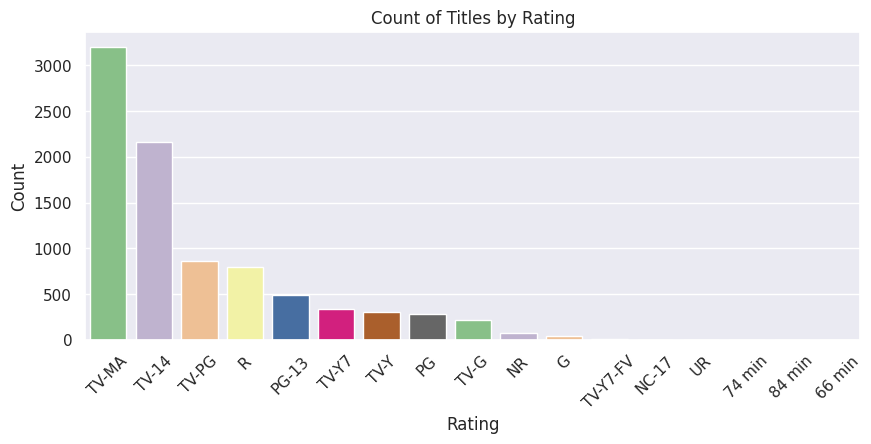

In [ ]:
plt.figure(figsize=(10, 4))
sns.set(style="darkgrid")
sns.countplot(x="rating", data=netflix_data, palette="Accent", order=netflix_data['rating'].value_counts().index)
plt.title('Count of Titles by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **3. Correlation Analysis**

a.Correlation matrix

To effectively carry out a correlation analysis, we'll need to focus on the numerical data present. Currently, the only numerical column is release_year. Since we have limited numerical data, we could also encode some of the categorical variables into a numerical format and explore their relationships. For example, we could convert the type column (which categorizes content as "Movie" or "TV Show") into a binary format and calculate correlations between it, release_year, and any other encodable categorical data.

Let's encode the type column into binary format (1 for "Movie" and 0 for "TV Show") and then calculate the correlation matrix for these variables along with release_year. If you have any other specific variables you'd like to encode and analyze, please let me know! Otherwise, I'll proceed with this plan.

The correlation matrix shows the following relationships:

Release Year and Type: There's a negative correlation of approximately -0.182 between the release_year and type_encoded (where Movies are encoded as 1 and TV Shows as 0). This suggests that more recent years tend to have a slightly higher proportion of TV Shows compared to Movies, or vice versa, older years have more Movies.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv')

# Encoding the 'type' column into a binary format: 1 for 'Movie', 0 for 'TV Show'
data['type_encoded'] = data['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Calculating the correlation matrix for 'release_year' and 'type_encoded'
correlation_matrix = data[['release_year', 'type_encoded']].corr()

# Display the correlation matrix
print(correlation_matrix)


              release_year  type_encoded
release_year       1.00000      -0.18171
type_encoded      -0.18171       1.00000


b. Correlation Heatmap

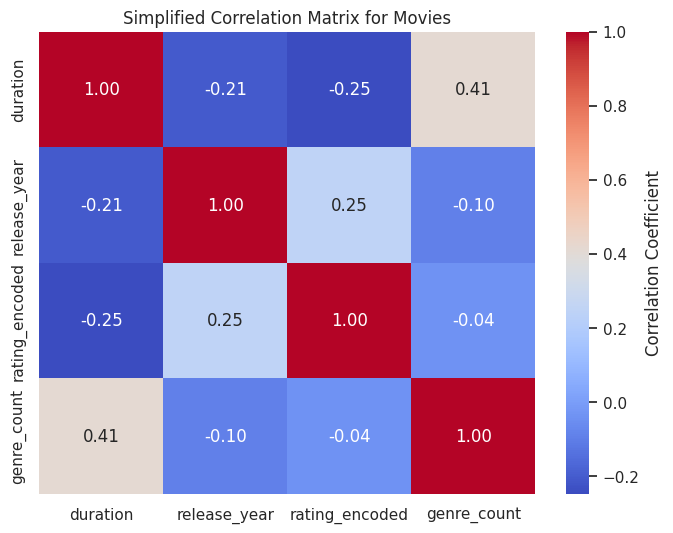

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode 'rating'
label_encoder = LabelEncoder()
movie_df['rating_encoded'] = label_encoder.fit_transform(movie_df['rating'].astype(str))

# Count number of genres listed in each movie
movie_df['genre_count'] = movie_df['listed_in'].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 0)

# Create a new dataframe for the correlation matrix with the encoded and count variables
movies_correlation_df_simple = movie_df[['duration', 'release_year', 'rating_encoded', 'genre_count']]

# Calculate the correlation matrix
simple_correlation_matrix = movies_correlation_df_simple.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
simple_heatmap = sns.heatmap(simple_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Simplified Correlation Matrix for Movies')
plt.show()


Correlation Analysis

**Release year and Duration**

Data Preparation

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv')

# Convert columns to appropriate data types
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Clean 'duration' column and convert to numeric
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

# Display the first few rows
print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating  duration  \
0 2021-09-25          2020  PG-13      90.0   
1 2021-09-24          2021  TV-MA       2.0   
2 2021-09-24          2021  TV-MA       1.0   
3 2021-09-24

Selecting Relevant Features

In [ ]:
# Select relevant features
relevant_features = ['release_year', 'duration']
correlation_data = df[relevant_features].dropna()

# Display the correlation matrix
correlation_matrix = correlation_data.corr()
print(correlation_matrix)


              release_year  duration
release_year      1.000000 -0.249182
duration         -0.249182  1.000000


Visualizing the Correlation Matrix

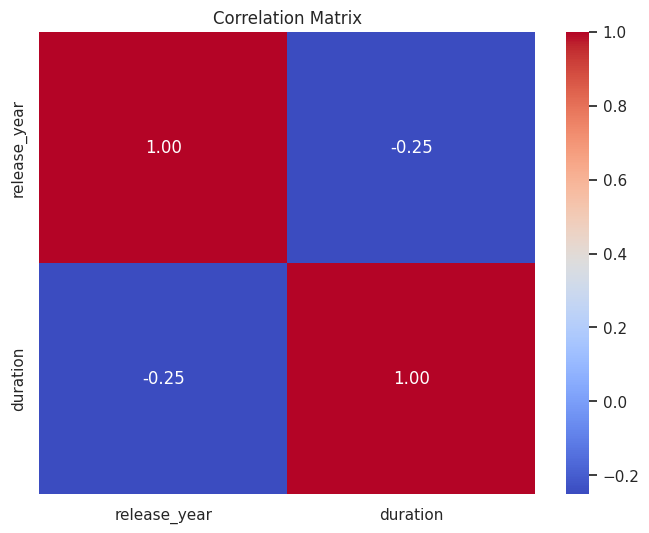

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**Detailed analysis:**

correlation between the **release year** and the **duration** of titles.

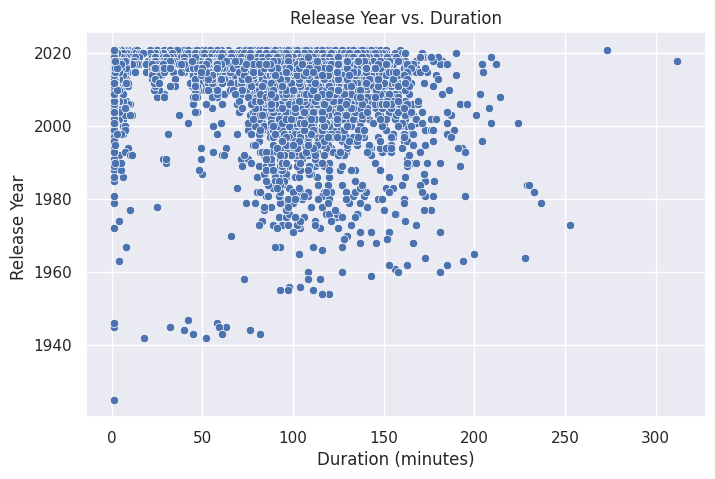

In [ ]:
# Scatter plot of release year vs. duration
plt.figure(figsize=(8, 5))
sns.scatterplot(x='duration', y='release_year', data=correlation_data)
plt.title('Release Year vs. Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Release Year ')
plt.show()


how correlations change over time by segmenting the data into different time periods.

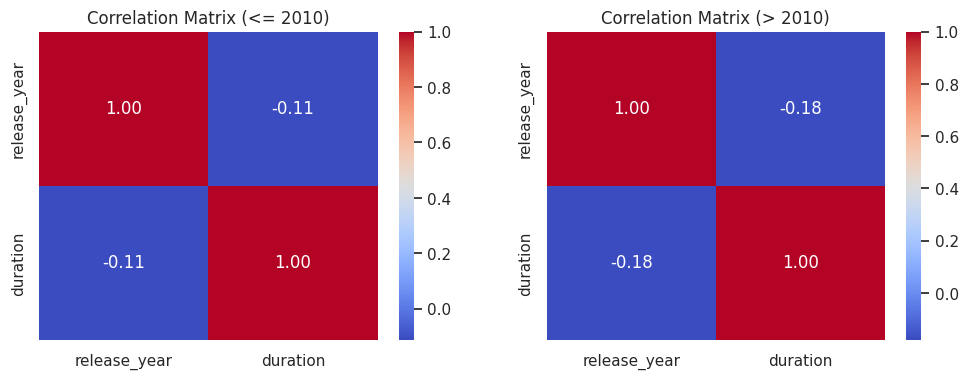

In [ ]:
# Segment the data into different time periods
period_1 = df[df['release_year'] <= 2010]
period_2 = df[df['release_year'] > 2010]

# Calculate correlation matrices for each period
correlation_matrix_period_1 = period_1[relevant_features].dropna().corr()
correlation_matrix_period_2 = period_2[relevant_features].dropna().corr()

# Plot the correlation matrices for each period
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_period_1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (<= 2010)')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_period_2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (> 2010)')

plt.show()


# **4. Trend Analysis**

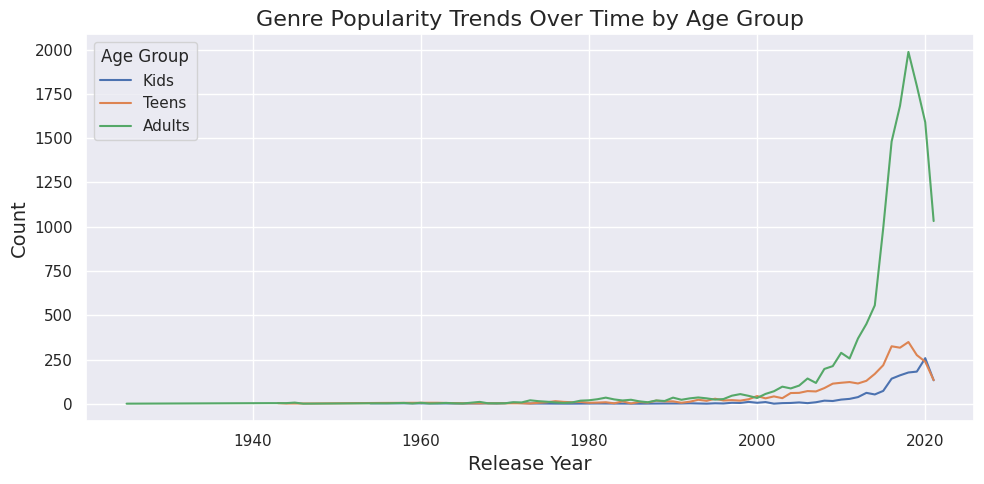

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
file_path = '/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv'
netflix_data = pd.read_csv(file_path)

# Define the age groups based on ratings
age_groups = {
    'Kids': ['TV-Y', 'TV-G', 'G', 'TV-Y7', 'TV-Y7-FV'],
    'Teens': ['PG', 'TV-PG', 'PG-13'],
    'Adults': ['R', 'NC-17', 'TV-MA']
}

# Map ratings to age groups
netflix_data['age_group'] = netflix_data['rating'].apply(
    lambda x: next((k for k, v in age_groups.items() if x in v), 'Adults')
)

# Ensure that 'listed_in' column is only split if it hasn't been already
if isinstance(netflix_data['listed_in'].iloc[0], str):
    netflix_data['listed_in'] = netflix_data['listed_in'].apply(lambda x: x.split(', '))

# Explode the 'listed_in' column to count each genre separately
netflix_data_exploded = netflix_data.explode('listed_in')

# Trend Analysis
# Group by age group, genre, and release year, then count occurrences
trend_data = netflix_data_exploded.groupby(['release_year', 'age_group', 'listed_in']).size().unstack(fill_value=0)

# Plot trend analysis
plt.figure(figsize=(10,5))
for age_group in age_groups.keys():
    trend_data_age_group = trend_data.xs(age_group, level='age_group').sum(axis=1).fillna(0)
    trend_data_age_group.plot(kind='line', ax=plt.gca(), label=age_group)

plt.title('Genre Popularity Trends Over Time by Age Group', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()



Q2. How has the quantity and type of content changed over the years?

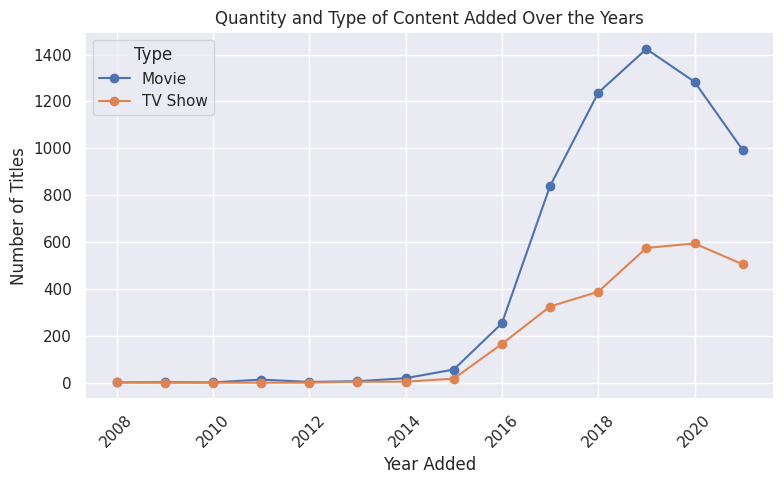

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv'
netflix_data = pd.read_csv(file_path)

# Preprocess the data: Convert date_added to datetime and extract year
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')
netflix_data['year_added'] = netflix_data['date_added'].dt.year

# Group by year_added and type to get the count
content_trends = netflix_data.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Plot the data as a line plot
plt.figure(figsize=(8, 5))
content_trends.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Quantity and Type of Content Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Q3. What is the distribution of content produced by different countries, and how has this changed over time?

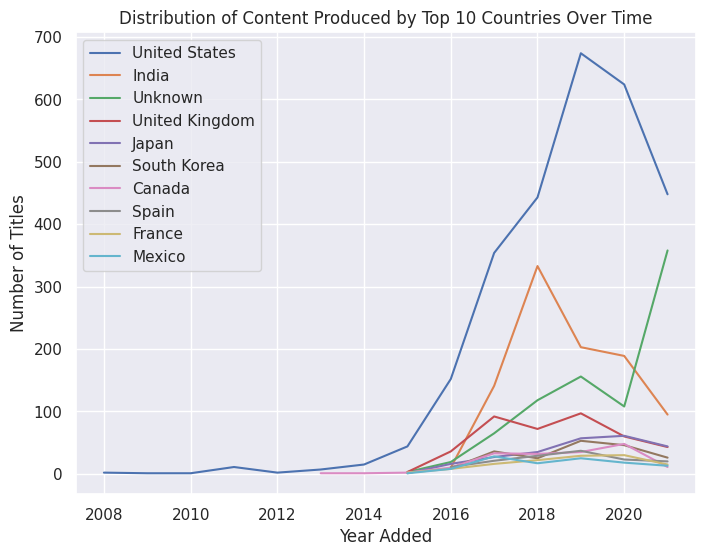

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv'
df = pd.read_csv(file_path)

# Fill NaN values in 'country' with 'Unknown'
df['country'].fillna('Unknown', inplace=True)

# Convert 'date_added' to datetime, handling different formats
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop rows where 'date_added' could not be parsed
df.dropna(subset=['date_added'], inplace=True)

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Count the number of shows/movies produced by each country
country_distribution = df['country'].value_counts().reset_index()
country_distribution.columns = ['Country', 'Count']

# Group by year and country to see changes over time
country_year_distribution = df.groupby(['year_added', 'country']).size().reset_index(name='Count')

# Plotting the distribution of content produced by different countries
plt.figure(figsize=(8, 6))
top_countries = country_distribution.head(10)['Country']
for country in top_countries:
    subset = country_year_distribution[country_year_distribution['country'] == country]
    plt.plot(subset['year_added'], subset['Count'], label=country)

plt.title('Distribution of Content Produced by Top 10 Countries Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True)
plt.show()


# **Time Series Analysis : Forcast Number of Title added**
particularly focusing on the trends over time such as the number of titles added each month or year. This can help us identify seasonal trends, growth patterns, and make future predictions.

In [ ]:
# Convert date_added to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

# Remove rows with NaT values in date_added
netflix_data = netflix_data.dropna(subset=['date_added'])

# Set date_added as the index
netflix_data.set_index('date_added', inplace=True)

# Resample to get the number of titles added each month
monthly_titles = netflix_data.resample('M').size()


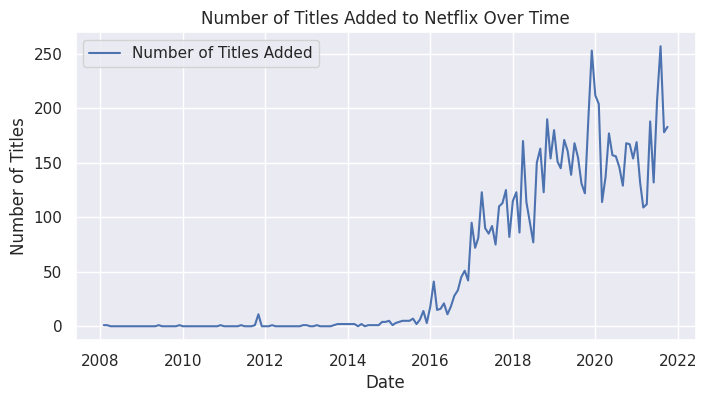

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(monthly_titles, label='Number of Titles Added')
plt.title('Number of Titles Added to Netflix Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()

Observed: The actual recorded values of the time series.

Trend: Long-term movement within the data (e.g., overall increase or decrease).

Seasonal: Recurrent patterns that repeat at fixed intervals (e.g., monthly or yearly cycles).

Residual: Irregular fluctuations or noise that remain after accounting for the trend and seasonal components.

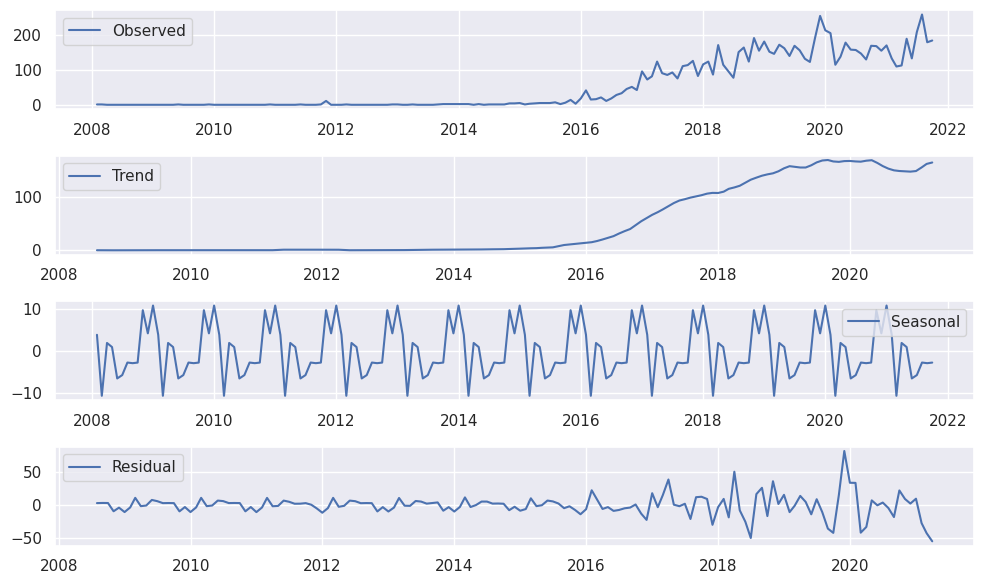

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(monthly_titles, model='additive')

# Plot the decomposed components
plt.figure(figsize=(10,6))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


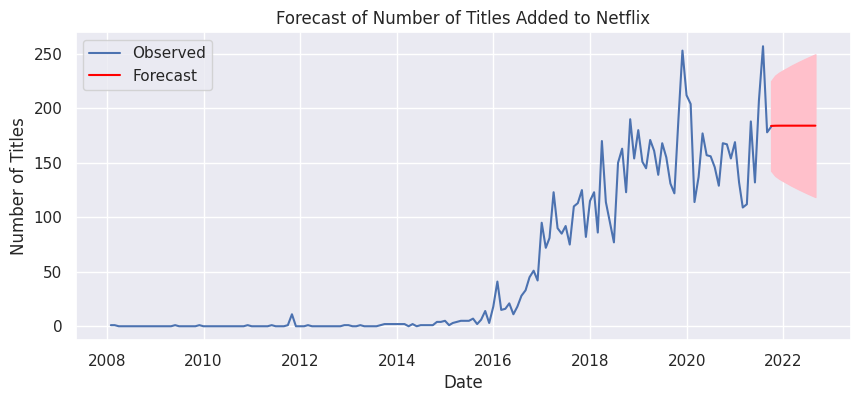

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(monthly_titles, order=(1, 1, 1))
fit = model.fit()

# Forecast future values
forecast = fit.get_forecast(steps=12)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a date range for the forecast
forecast_dates = pd.date_range(start=monthly_titles.index[-1], periods=12, freq='M')

# Plot the forecasted values
plt.figure(figsize=(10, 4))
plt.plot(monthly_titles, label='Observed')
plt.plot(forecast_dates, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink')
plt.title('Forecast of Number of Titles Added to Netflix')
plt.xlabel('Date')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()


# **5. Predictive Analysis**

# **Linear Regression**
Linear regression with predictors:

'type', 'rating', 'listed_in','release_year'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load and preprocess your data
data = pd.read_csv('/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv')

# Ensure 'duration' is a string and apply conversion only to rows with 'min' in the duration
data['duration_numeric'] = data['duration'].astype(str).apply(lambda x: int(x.split()[0]) if 'min' in x else None)

# Drop rows where duration_numeric is NaN
data = data.dropna(subset=['duration_numeric'])

# Preparing the data with one-hot encoding for categorical variables
categorical_features = ['type', 'rating', 'listed_in']
one_hot = OneHotEncoder()

# Including release_year directly since it's already numeric and does not need encoding
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)

# Define the features to transform and concatenate release_year directly since it's already numeric
data['release_year'] = data['release_year'].astype(float)  # Ensuring release_year is in the correct type
features_to_transform = data[categorical_features + ['release_year']]

# Applying transformation
transformed_X = transformer.fit_transform(features_to_transform)

# Define the target variable (y) and predictors (X)
X = transformed_X
y = data['duration_numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 423.7487529781695
R² Score: 0.40141146358451063


<ipython-input-53-218b294c0598>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_year'] = data['release_year'].astype(float)  # Ensuring release_year is in the correct type


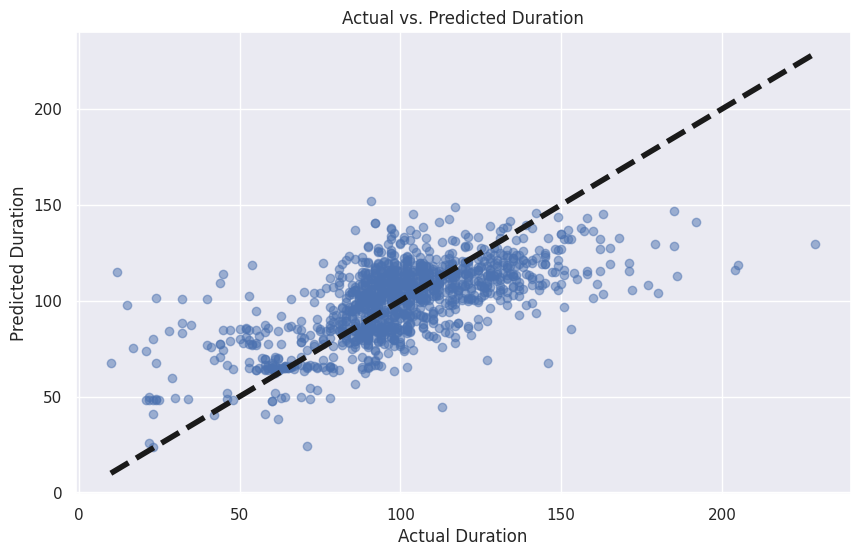

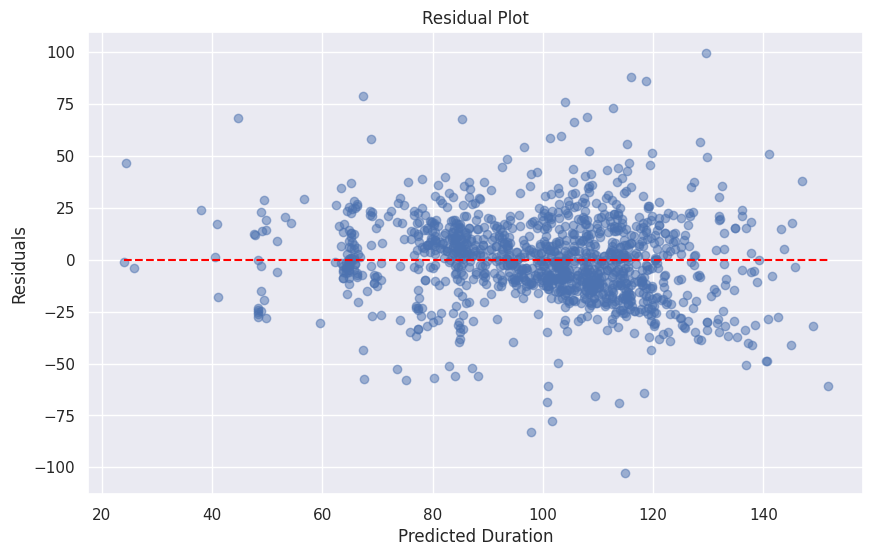

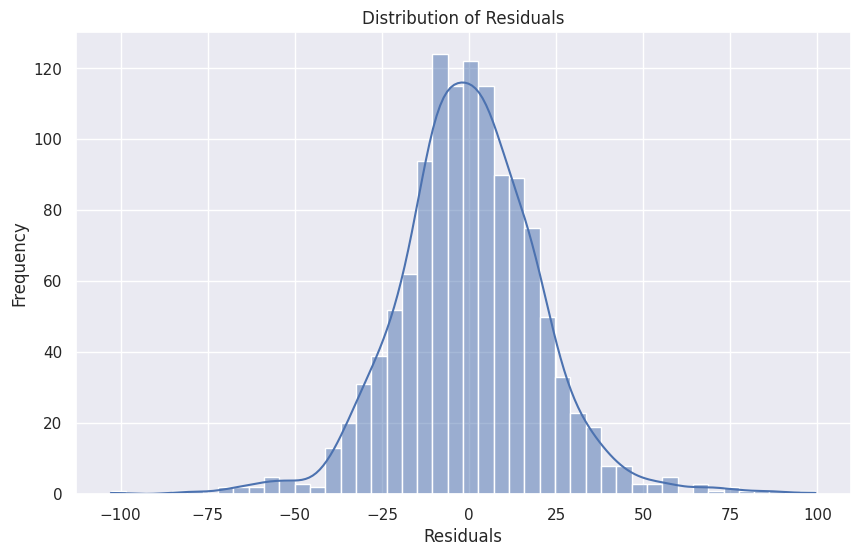

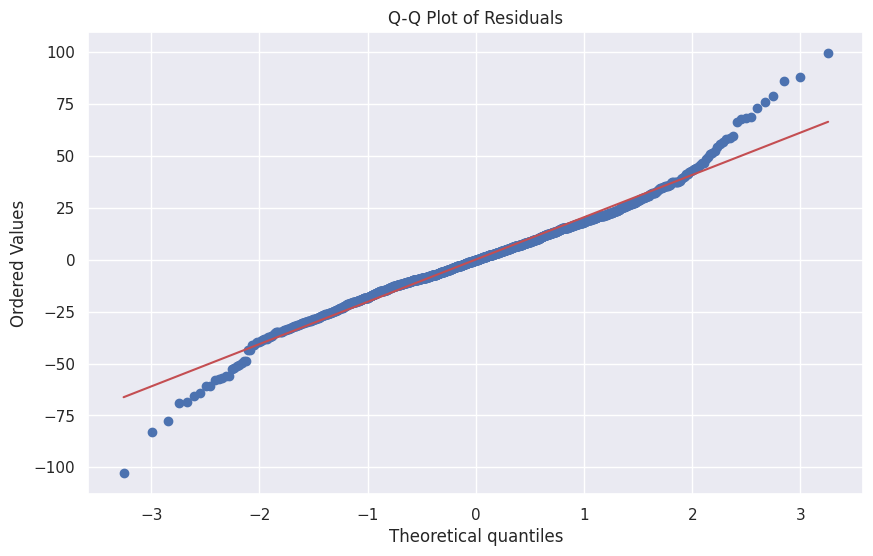

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats  # Import stats from scipy for the Q-Q plot

# Assuming y_test and y_pred are already defined from your model's predictions
# Scatter Plot of Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Duration')
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line showing perfect predictions
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Duration')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.show()

# Histogram of the Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot of Residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
# Accessing the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: 1082.6675428881651
Coefficients: [-1.28164864e-11 -2.88215743e+00  4.25900329e+00  3.28078263e+00
  7.94105637e+00  1.32722330e+01  1.29545247e+01  1.08059019e+01
 -5.62837242e+00  6.21160100e+00  3.21092828e+00 -2.78939640e+01
 -1.37964417e+01 -7.78322696e+00 -5.07122507e+00  1.11935652e+00
  1.22544114e-01 -1.03506114e+01 -3.62585070e+00 -9.26054836e-01
 -8.09760016e-01 -1.05362192e+01  1.19063660e-01  2.65009588e+01
  5.79573253e+00 -3.75115933e+00  0.00000000e+00  7.88555448e+00
  1.38718558e+00  2.22224042e+01  1.31041491e+00  2.17686415e+01
 -2.32606397e+00  2.64714633e+01  3.84148377e+01 -1.94680403e+01
 -2.02420434e+00 -1.10127912e+01  2.72707388e+01 -4.97383067e+00
 -1.72764214e+01  1.05563464e+01  1.96115566e+01 -3.62702823e+00
  2.47605776e+00 -8.82962249e-01 -5.72107708e+00  0.00000000e+00
  1.49147100e+01 -3.11484374e+00 -7.56643538e+00  0.00000000e+00
  8.59090518e+00  6.03036740e+00  1.30994858e+01  3.09542104e+01
 -6.97459395e+00  7.22023761e+00  1.97763522e-

# ***Random Forest***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score  # Make sure r2_score is imported here
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Continue with your data loading and preprocessing...

# Load data
data = pd.read_csv('/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv')

# Ensure 'duration' is a string and apply conversion only to rows with 'min' in the duration
data['duration_numeric'] = data['duration'].astype(str).apply(lambda x: int(x.split()[0]) if 'min' in x else np.nan)

# Drop rows where duration_numeric is NaN and ensure all necessary columns are present
data.dropna(subset=['duration_numeric', 'type', 'release_year', 'rating', 'listed_in'], inplace=True)

# One-hot encoding
categorical_features = ['type', 'rating', 'listed_in']
one_hot_encoder = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot_encoder, categorical_features)], remainder='passthrough')

# Apply transformations
X_transformed = transformer.fit_transform(data[categorical_features + ['release_year']])
y = data['duration_numeric']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Correctly using r2_score after import

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 410.9763092556235
R-squared: 0.4257266046371755


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

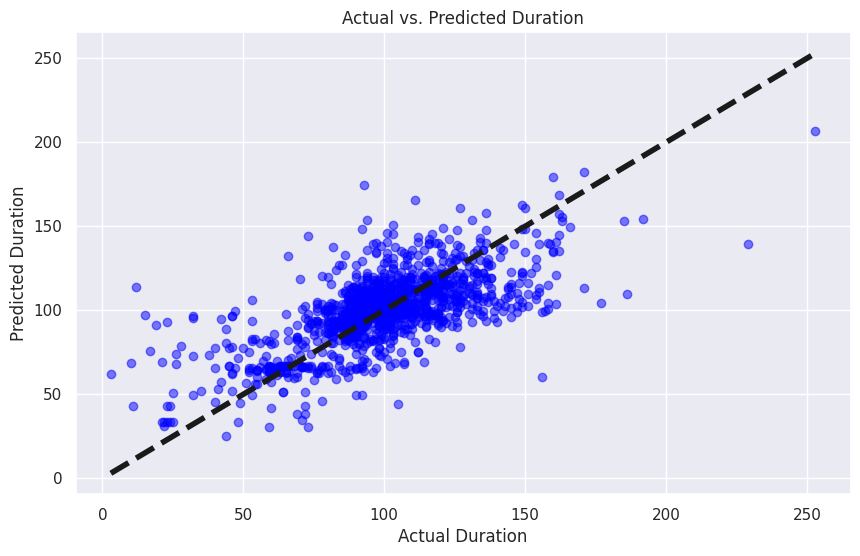

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect prediction
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs. Predicted Duration')
plt.show()


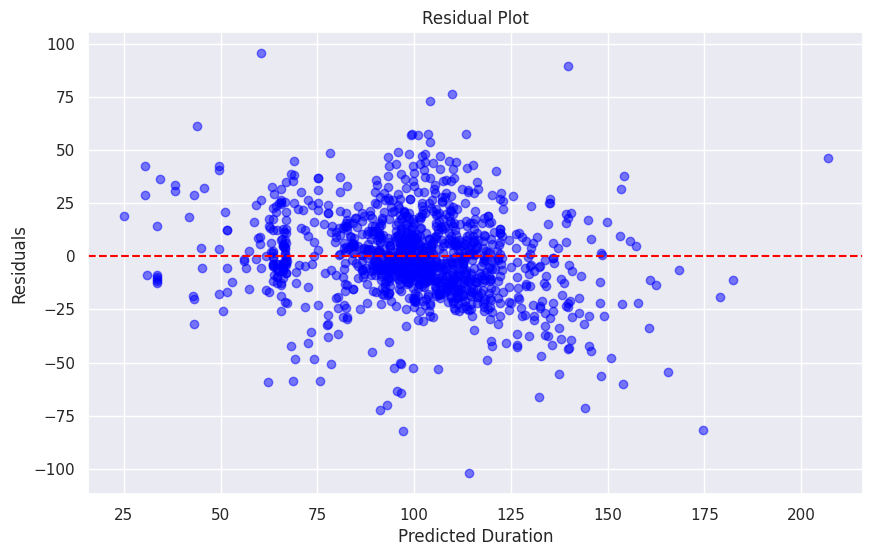

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Duration')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


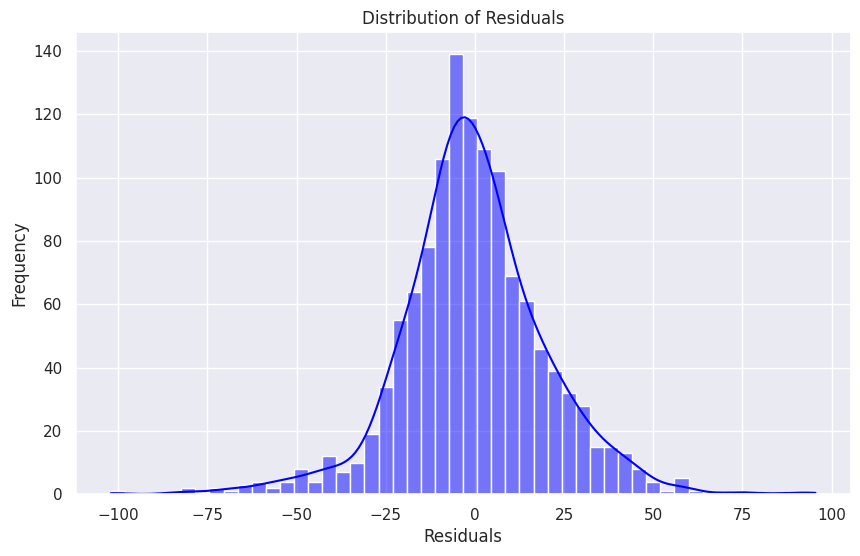

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


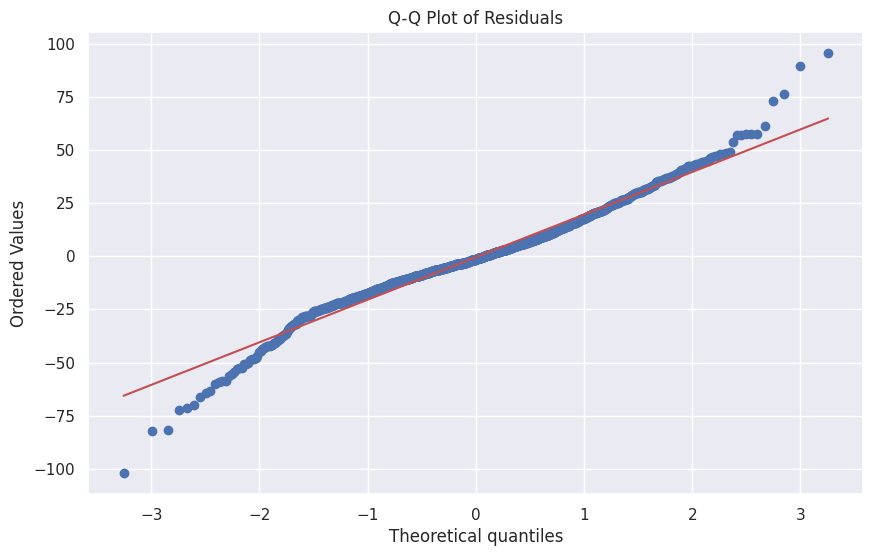

In [ ]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


# **Text Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import TextBlob
import nltk

In [ ]:
data = data = pd.read_csv('/content/drive/MyDrive/WebnSocial_Project/netflix_titles.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


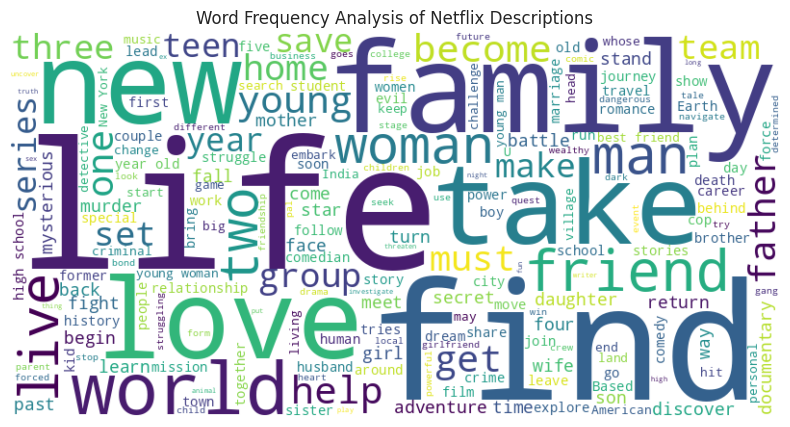

In [ ]:
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
all_words = ' '.join([text for text in data['description']])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency Analysis of Netflix Descriptions')
plt.show()

# **Dashboard**

In [ ]:
# Count the number of movies vs TV shows
content_type_count = df['type'].value_counts()
fig_content_type = px.pie(values=content_type_count.values, names=content_type_count.index,
                          title="Movies vs. TV Shows on Netflix")

# Add this figure to your dashboard layout


In [ ]:
# Count the number of titles produced by the top 10 countries
country_count = df['country'].value_counts().nlargest(10)
fig_country = px.bar(country_count, x=country_count.index, y=country_count.values,
                     labels={'x': 'Country', 'y': 'Number of Titles'},
                     title="Top 10 Countries of Origin on Netflix")

# Add this figure to your dashboard layout


In [ ]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df = df.dropna(subset=['date_added'])

# Group by year and count the number of titles added
df_yearly = df.groupby(df['date_added'].dt.year).size()

# Line chart for time series
fig_time_series = px.line(df_yearly, x=df_yearly.index, y=df_yearly.values,
                          labels={'x': 'Year', 'y': 'Number of Titles'},
                          title="Netflix Titles Added Over Time")

# Add this figure to your dashboard layout


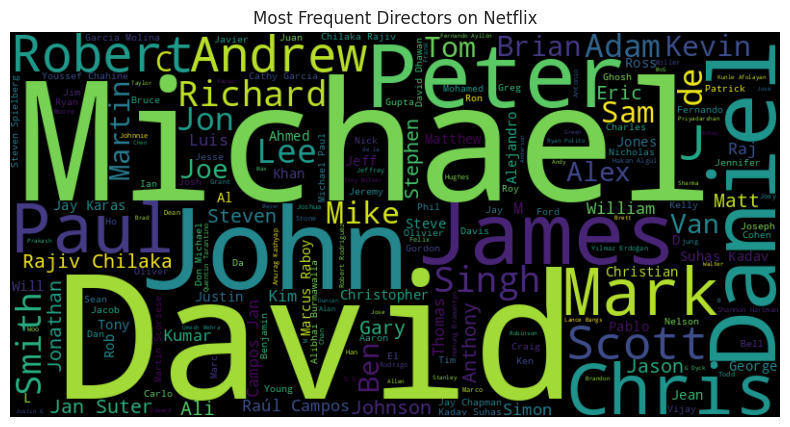

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for directors
directors = ' '.join(df['director'].dropna().values)
wordcloud = WordCloud(width=800, height=400).generate(directors)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Directors on Netflix")
plt.show()

# Add this as an image to your dashboard


In [ ]:
!pip install dash-bootstrap-components


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 4.1 MB/s eta 0:00:00


In [ ]:
from dash import Dash, dcc, html
import dash_bootstrap_components as dbc
import plotly.express as px
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
from io import BytesIO

# Initialize the Dash app with Bootstrap theme
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Assuming 'df' is your dataset
# Sample data loading (replace this with your actual dataset)
# df = pd.read_csv('path_to_your_netflix_dataset.csv')

# Visualization 1: Movies vs TV Shows Pie Chart
content_type_count = df['type'].value_counts()
fig_content_type = px.pie(values=content_type_count.values, names=content_type_count.index,
                          title="Movies vs. TV Shows on Netflix")

# Visualization 2: Top 10 Countries of Origin
country_count = df['country'].value_counts().nlargest(10)
fig_country = px.bar(country_count, x=country_count.index, y=country_count.values,
                     labels={'x': 'Country', 'y': 'Number of Titles'},
                     title="Top 10 Countries of Origin on Netflix")

# Visualization 3: Time Series of Netflix Titles Added Over Time
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df = df.dropna(subset=['date_added'])
df_yearly = df.groupby(df['date_added'].dt.year).size()
fig_time_series = px.line(df_yearly, x=df_yearly.index, y=df_yearly.values,
                          labels={'x': 'Year', 'y': 'Number of Titles'},
                          title="Netflix Titles Added Over Time")

# Word Cloud for Directors
directors = ' '.join(df['director'].dropna().values)
wordcloud = WordCloud(width=800, height=400).generate(directors)

# Save word cloud to a file in memory and encode to base64 for display in the dashboard
buffer = BytesIO()
wordcloud.to_image().save(buffer, format="png")
encoded_image = base64.b64encode(buffer.getvalue()).decode('utf-8')

# Layout with Bootstrap for concise display
app.layout = html.Div(children=[
    html.H1(children='Netflix Data Analysis Dashboard'),

    dbc.Row([
        dbc.Col([
            dcc.Graph(id='content-type-pie-chart', figure=fig_content_type)
        ], width=6),
        dbc.Col([
            dcc.Graph(id='country-bar-chart', figure=fig_country)
        ], width=6)
    ]),

    dbc.Row([
        dbc.Col([
            dcc.Graph(id='time-series-chart', figure=fig_time_series)
        ], width=6),
        dbc.Col([
            html.H2("Most Frequent Directors on Netflix"),
            html.Img(src=f"data:image/png;base64,{encoded_image}", style={'width': '100%', 'height': 'auto'})
        ], width=6)
    ])
])

# Run the app inline in Jupyter/Colab
app.run_server(mode='inline')


<IPython.core.display.Javascript object>